# Lecture 1 Worksheet

### Plan for today

- Create an Altair plot for your first dashboard
- Install Dash
- Revisit using the shell to run commands
- Get familiar with editing in [Visual Studio Code](https://code.visualstudio.com/download)
    - Available for Windows, macOS, and Linux
    - Download and install it
- Create the first Dash app
- Launch the first Dash app

## Lecture Part 1: Best of 531 Dashboards



> No coding for this part of the lecture

## Lecture Part 2: Vision for Visualizations

> No coding for this part of the lecture

## Lecture Part 3: Preparing to build Dashboards

### Step 1: Get re-familiarized with the Terminal/Console/Powershell

To do this, we need to venture beyond jupyter notebooks as the dashboards run as .py files 

- Open a Terminal/Console/Powershell (henceforth **shell**) window
- Use `pwd` to check the current directory
- Use `cd` to change to this directory
- We want to navigate to the directory that has this notebook
- See below for the command to get the path to this directory - `os.getcwd()`

In [1]:
import os
# os.getcwd() will give you the path of the current working directory

print('In a terminal/console/Powershell/Gitbash, type:')
      
print('\tcd "{0}"'.format(os.getcwd()))

In a terminal/console/Powershell/Gitbash, type:
	cd "/Users/fmoosvi/Sync/mds/DSCI_532_viz-2_instructors/lectures/Lecture 1"


### Step 2: Check to make sure we can use `python` in your shell

**Remember: If you are on macOS Catalina, you may need to run `python3`**

*If you are having trouble on windows, you may need to check where your python installation is linked `where python`. If you are having issues, try not to get discouraged, it's probably just a path issue stemming from an install issue on your machine. Come to the office hours and we'll help you get set up!*

Now that you're in this directory, let's first create a file `toy.py` file and see if we can run it from a shell:

- In your shell, create a new .py file: 
    - `touch toy.py`
- Look at the directory contents to make sure you can see the new file:
    - `ls`
- Open this file in the shell:
    - `pico toy.py` 
    - On Linux, you can use `vim` or `gedit`
    - On macOS, try `nano`, `pico`, `vim`, etc..
    - On Windows, in Powershell, try `nano` or `pico` but if it doesn't work you may need to open the file in your favourite text editor
- Add this line to your `toy.py` file, save it, and return to your shell:
    - print('Hello World - this will print out when you run it with python `toy.py`')
- If you get errors like "command not found", there is a problem with your paths and installation of python. Make sure you followed the steps [here in the MDS Install Guide](https://ubc-mds.github.io/resources_pages/installation_instructions/). If you still can't get it, go to office hours ASAP to sort this out.

### Step 3: Install dependencies (done in a shell)

#### Unfortunately the conda version of dash is out of date, so we will use pip or pip3 to install dash

**Do NOT use `conda` to install Dash!**

#### Let's use pip instead:

- `pip install dash`
- `pip install dash-bootstrap-components`
- `pip install gunicorn`

If you have already install it and you want to update it,

`pip install dash --upgrade`

*Note: if you are on macOS Catalina, you may need to use `python3` and/or `pip3` instead of `python` and `pip`*

The above should install all dependencies including:

- dash, 
- dash-renderer
- dash-html-components
- dash-core-components
- dash-bootstrap-components
- plotly
- gunicorn

### Step 4: Import dash components and check the version

In [2]:
# dash

import dash
assert dash.__version__ == '1.6.1', "Your version may not be up-to-date, update dash"

In [3]:
# dash_core_components

import dash_html_components as dcc
assert dcc.__version__ == '1.0.2', "Your version may not be up-to-date, update dash"

In [4]:
# dash_html_components

import dash_html_components as html
assert html.__version__ == '1.0.2', "Your version may not be up-to-date, update dash"

In [5]:
# dash-bootstrap-components

import dash_bootstrap_components as dbc
assert dbc.__version__ == '0.7.2', "Your version may not be up-to-date, update dash-bootstrap-components"


In [6]:
# gunicorn

import gunicorn
assert gunicorn.__version__ == '20.0.0', "Your version may not be up-to-date, update dash"

**Assuming you got no assert errors in the previous four cells, congratulations! You now have dash installed and it's on the most recent version!**✅ 🎊

## Lecture Part 3: The Magic of Altair

### Step 5: Create a plot in Altair for your dashboard

In [7]:
import altair as alt
import numpy as np
import pandas as pd
import vega_datasets

# Uncomment this line if you are in a Jupyter Notebook (not JupyterLab) environment
# alt.renderers.enable('notebook')

def mds_special():
    font = "Arial"
    axisColor = "#000000"
    gridColor = "#DEDDDD"
    return {
        "config": {
            "title": {
                "fontSize": 24,
                "font": font,
                "anchor": "start", # equivalent of left-aligned.
                "fontColor": "#000000"
            },
            'view': {
                "height": 300, 
                "width": 400
            },
            "axisX": {
                "domain": True,
                #"domainColor": axisColor,
                "gridColor": gridColor,
                "domainWidth": 1,
                "grid": False,
                "labelFont": font,
                "labelFontSize": 12,
                "labelAngle": 0, 
                "tickColor": axisColor,
                "tickSize": 5, # default, including it just to show you can change it
                "titleFont": font,
                "titleFontSize": 16,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "X Axis Title (units)", 
            },
            "axisY": {
                "domain": False,
                "grid": True,
                "gridColor": gridColor,
                "gridWidth": 1,
                "labelFont": font,
                "labelFontSize": 14,
                "labelAngle": 0, 
                #"ticks": False, # even if you don't have a "domain" you need to turn these off.
                "titleFont": font,
                "titleFontSize": 16,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "Y Axis Title (units)", 
                # titles are by default vertical left of axis so we need to hack this 
                #"titleAngle": 0, # horizontal
                #"titleY": -10, # move it up
                #"titleX": 18, # move it to the right so it aligns with the labels 
            },
        }
            }

# register the custom theme under a chosen name
alt.themes.register('mds_special', mds_special)

# enable the newly registered theme
alt.themes.enable('mds_special')
#alt.themes.enable('none') # to return to default

ThemeRegistry.enable('mds_special')

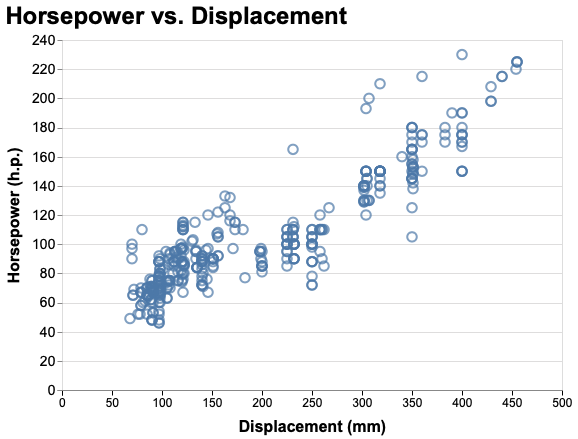

In [8]:
# Create a plot of the Displacement and the Horsepower of the cars dataset

chart = alt.Chart(vega_datasets.data.cars.url).mark_point(size=90).encode(
            alt.X('Displacement:Q', title = 'Displacement (mm)'),
            alt.Y('Horsepower:Q', title = 'Horsepower (h.p.)'),
            tooltip = ['Horsepower:Q', 'Displacement:Q']
        ).properties(title='Horsepower vs. Displacement',
                    width=500, height=350).interactive()

chart

Did you know that "behind the scenes", Altair can easily create a simply HTML page that loads Vega, Vega-Lite, and vegaEmbed so charts are automatically rendered in the browser?

Try it!

**TODO**: Save the chart above as an HTML file; directions here but it's as simple as adding `.save('<filename>.html')` to the Altair chart object
   

In [9]:
# Your answer here

Important: Check to see if it worked by opening the HTML file you created in a browser and a text editor (we recommend [VS Code](https://code.visualstudio.com/Download) in MDS).

We are now ready to create our first interactive dashboard using Dash!

### Step 6: Create a dash app 

To create your first app, we will use a template file from the Dash websites that's been slightly modified.

Copy the following lines to a new file in the current directory, called `app1.py`

```
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__, assets_folder='assets')
server = app.server

app.title = 'Dash app with pure Altair HTML'

app.layout = html.Div([

    ### ADD CONTENT HERE like: html.H1('text'),
])

if __name__ == '__main__':
    app.run_server(debug=True)
    
```

### Step 7: In the console/terminal, run `python app1.py`

- Look at the output of your shell, navigate that to that address in a browser.

- It will look something like http://127.0.0.1:8050

- Once you have the app running in a browser, try changing some text in `app1.py` and see what happens!

- If your app crashes, look at the error message that gets printed out, and re-run the app using
    - `python app1.py`



### Step 8: Add the Altair chart to the dashboard

Note that the content of the HTML file needs to go inside `srcDoc=` and the entire HTML content needs to be surrounded by triple backticks: ```

```
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__, assets_folder='assets')
server = app.server

app.title = 'Dash app with pure Altair HTML'

app.layout = html.Div([

    ### ADD CONTENT HERE like: html.H1('text'),

    ### Let's now add an iframe to bring in HTML content

    html.Iframe(
        sandbox='allow-scripts',
        id='plot',
        height='500',
        width='500',
        style={'border-width': '5px'},
        
        ################ The magic happens here
        srcDoc=open('chart.html').read()
        ################ The magic happens here
        ),
])

if __name__ == '__main__':
    app.run_server(debug=True)
    
```

### Step 9: Complexify the chart

Just for demo purposes, let's create a grid of charts and see how Dash handles this. Don't forget to extend the height and width of your IFrame to make space for this!

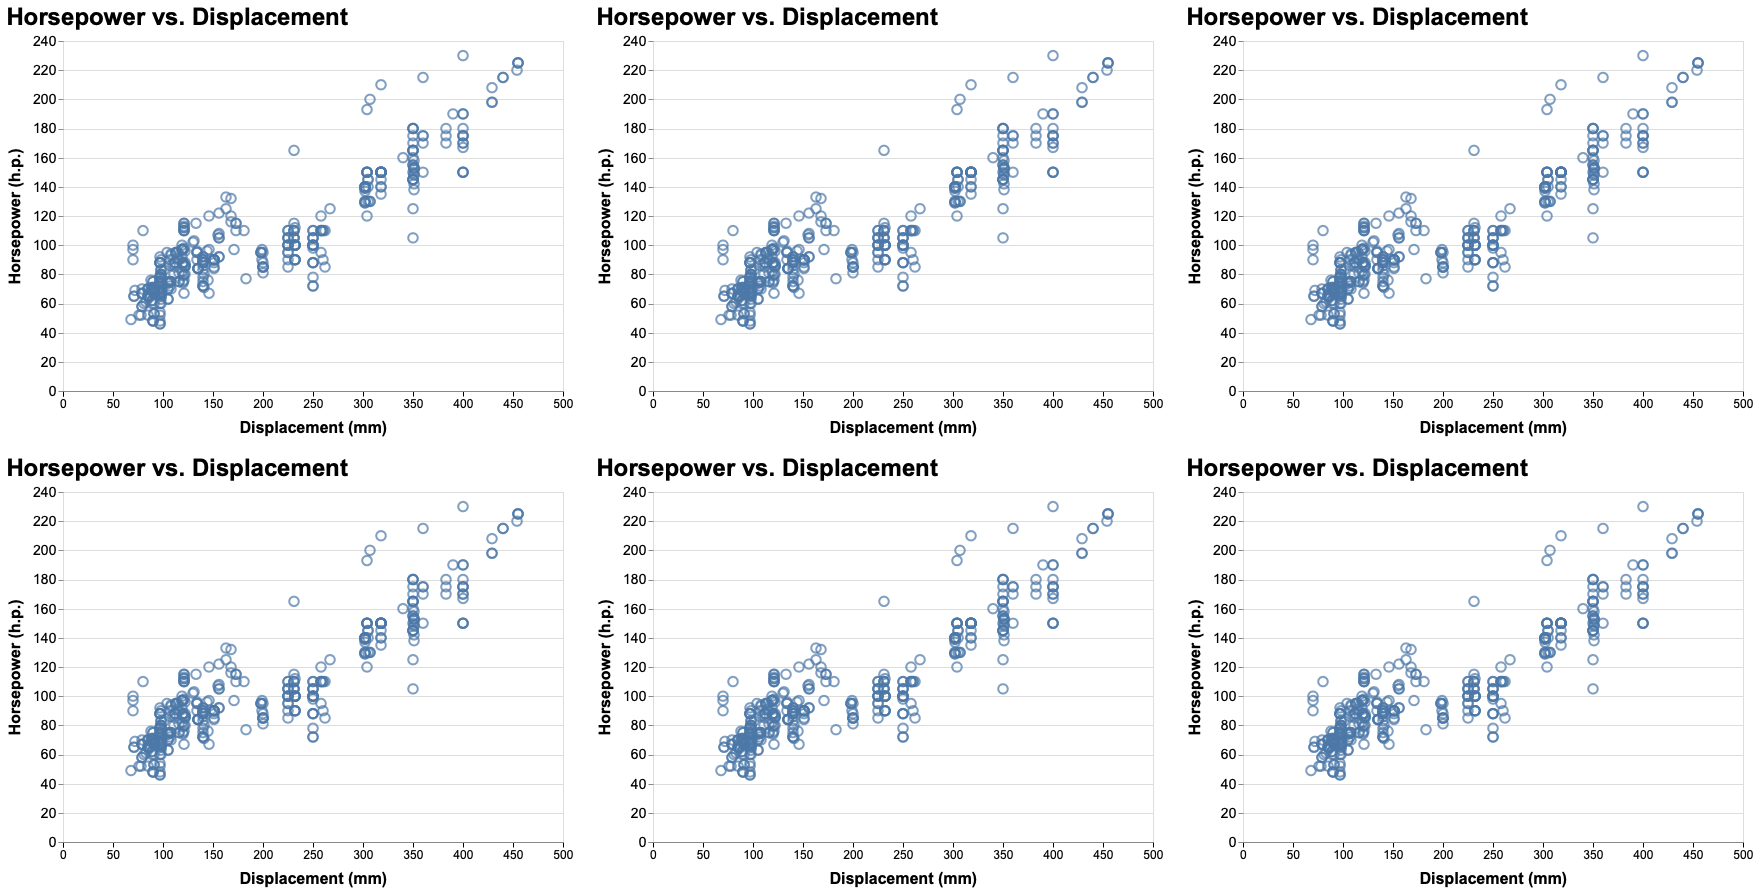

In [10]:
complex_chart = (chart & chart.copy() | chart & chart | chart & chart)

complex_chart.save('complex_chart.html')

complex_chart

### Step 10: Add the complex chart to your Dashboard

- Replace `complex_chart.html` in `srcDoc=open('....')` 
- Try interacting with the app now

### Step 11: Run a high-quality Dashboard

Steps to run:
    
1. `git clone https://github.com/firasm/dash_uber_demo.git` this repo locally
1. Navigate to the directory
1. Run `python app.py`
1. Visit http://127.0.0.1:8050/ to see the demo